In [27]:
import qiskit

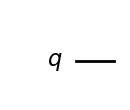

In [28]:
from qiskit import QuantumCircuit 
qc = QuantumCircuit(1, name="First circuit")
qc.draw("mpl")

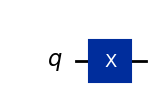

In [29]:
qc.x(0)
qc.draw("mpl")

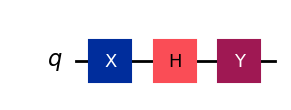

In [30]:
qc.h(0)
qc.y(0)
qc.draw("mpl")

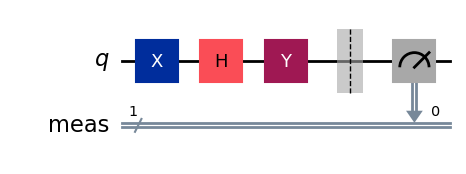

In [31]:
qc.measure_all() #
qc.draw("mpl")

$ X \frac{1}{2} (|0 \rangle + |1 \rangle)  = \frac{1}{2} (|1 \rangle + |0 \rangle)$

$ X \frac{3}{5} |0 \rangle + \frac{4}{5}|1 \rangle = \frac{3}{5} |1 \rangle + \frac{4}{5}|0 \rangle $

이는 행렬1 * 실수 * 행렬2로 생각할 수 있으므로,
실수 * (행렬1 * 행렬2)로 계산할 수 있다.

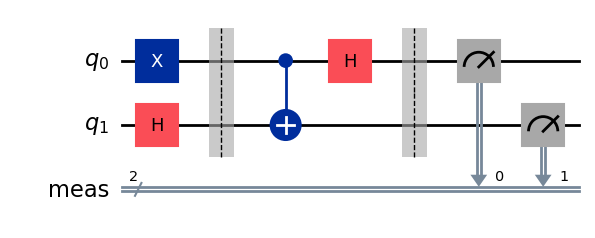

In [38]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.h(1)
qc2.barrier([0, 1])
qc2.cx(0, 1)
qc2.h(0)
qc2.measure_all()
qc2.draw("mpl")

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [43]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(qc2, simulator) #

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)

In [44]:
qc2.draw()

┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ X ├─░───■──┤ H ├─░─┤M├───
        ├───┤ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ┤ H ├─░─┤ X ├──────░──╫─┤M├
        └───┘ ░ └───┘      ░  ║ └╥┘
meas: 2/══════════════════════╩══╩═
                              0  1

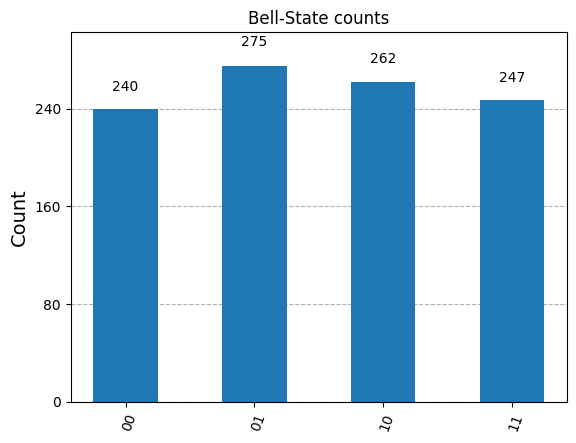

In [45]:
plot_histogram(counts, title='Bell-State counts')

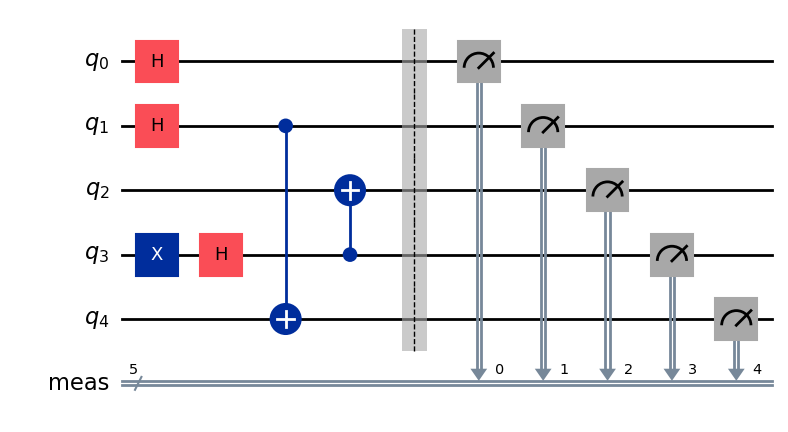

In [46]:
# 1. Qubit을 몇개를 쓸 지 정의합니다.
qc = QuantumCircuit(5) # 우린 5개를 사용해보죠.
# 2. 양자 게이트들을 회로에 적용해 봅니다.
# ----- 이렇게 생긴 Circuit을 만들어 봅시다.
qc.x(3)
qc.h(0)
qc.h(1)
qc.h(3)
qc.cx(3, 2)
qc.cx(1, 4)
qc.measure_all()
# 3. `qc.draw()` 로 circuit을 확인해 봅시다.
qc.draw("mpl")

In [47]:
# 4. 양자 회로를 돌릴 기기를 가져옵시다. 여기서는 Simulator입니다.
simulator = AerSimulator()
# 5. 우리가 만든 회로를 기기에 맞게 변형시켜 줍니다.
circ = transpile(qc, simulator)
# 6. 회로를 돌려서 결과를 얻읍시다.
result = simulator.run(circ).result()

In [48]:
# 7. 결과에서 다양한 값을 얻어 볼 수 있습니다.
counts = result.get_counts(circ)

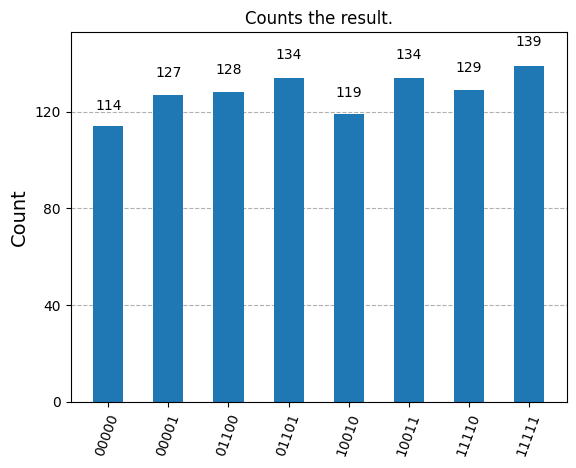

In [49]:
plot_histogram(counts, title='Counts the result.')

Qubit 2개를 쓴 회로를 만들어보세요, X, H, CNOT 3개를 조합해, (00, 11)이나 (10, 01) 만이 측정되는 회로를 만들어봅시다.

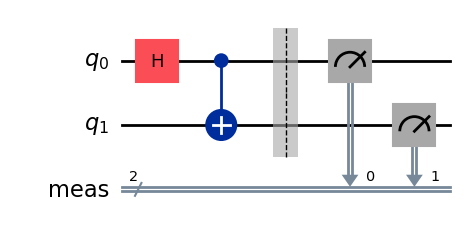

In [54]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw("mpl")

In [55]:
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()

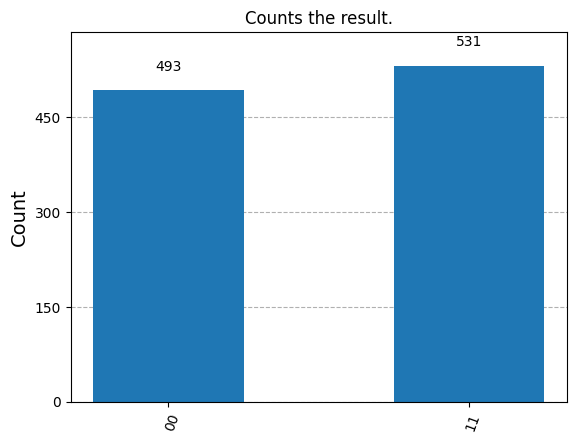

In [56]:
counts = result.get_counts(circ)
plot_histogram(counts, title='Counts the result.')

3개 qubit에서 (000, 111)만 측정되는 회로를 만들어봅시다.

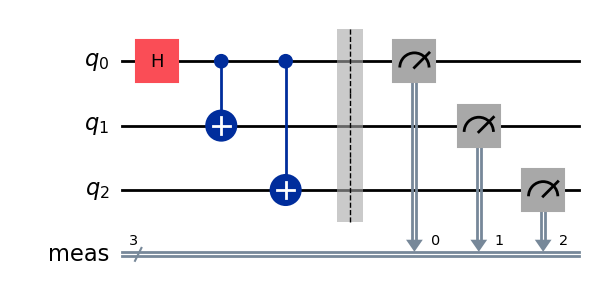

In [59]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()
qc.draw("mpl")

In [60]:
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()

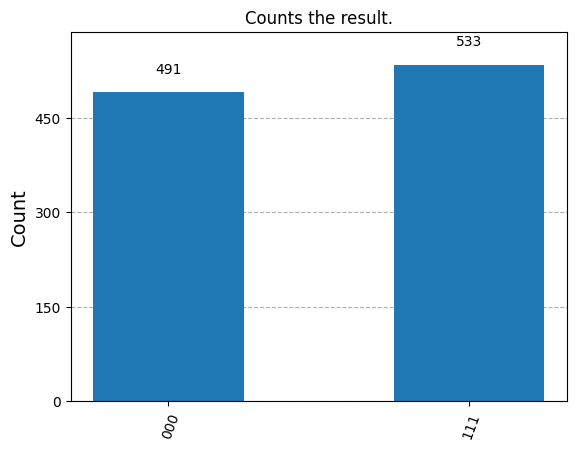

In [61]:
counts = result.get_counts(circ)
plot_histogram(counts, title='Counts the result.')

Q. 예를 들어서 행렬을 계산하는 과정에서는, 곱셈과 덧셈이 모두 사용됩니다. 4 번의 곱셈은 4번의 덧셈과 소모되는 시간이 같을까요?

A. 다르다. $ m \times n $행렬과 $ n \times p$ 을 곱하는 과정에서는 $ m \times p $ 크기에 행렬 각 칸을 체워야 하므로 총 $ m \times p \times n$번의 곱샘이 필요하다.

다만 덧셈의 경우 단지 $m \times n$ 번의 연산이 필요로 한다.

자연수 덧셈과 곱셈의 복잡도가 같다고 가정하더라도 행렬곱의 복잡도가 훨씬 크므로 소모되는 시간은 달라야할 것이다.

Q. 다음 행렬 4개를 곱한다고 합시다. 

$ A \cdot (B\cdot (C \cdot D)) $

$A \cdot (B \cdot C) \cdot D$ 과 순서대로, $A \cdot (B\cdot (C \cdot D))$ 계산하는 것에 차이가 있을까요? 직사각형 행렬을 생각해 보고 답해보세요.

A. $ A \cdot B \cdot C \cdot D$를 계산할 때 순서가 달라진다고 해서 계산 자체의 복잡도는 달라지지 않는다.(자연수의 덧셈 연산과 곱셈 연산의 복잡도가 같다고 가정한다)

다만, 컴퓨터는 순차적으로 작업을 하므로 작업 순서를 지정하는 과정에서 $ A \cdot (B \cdot (C \cdot D))$ 의 계산이 훨씬 복잡할 것이다